In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [2]:
epi_quasi_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\0\quasi")
epi_quasi_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\1\quasi")

In [3]:
epi_quasi_ec_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [4]:
epi_quasi_eo_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [5]:
for i, pth in enumerate(epi_quasi_ec_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_ec_results[i, :, :, :] = current.copy()

In [6]:
for i, pth in enumerate(epi_quasi_eo_folder.iterdir()):
    current = np.load(pth)
    epi_quasi_eo_results[i, :, :, :] = current.copy()

In [7]:
epi_quasi_results = epi_quasi_ec_results.__add__(epi_quasi_ec_results)/2

In [8]:
srm_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\quasi")

In [9]:
srm_quasi_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [10]:
for i, pth in enumerate(srm_quasi_folder.iterdir()):
    current = np.load(pth)
    srm_quasi_results[i, :, :, :] = current.copy()

In [11]:
spis_quasi_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_1\quasi")

In [12]:
spis_quasi_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [13]:
for i, pth in enumerate(spis_quasi_folder.iterdir()):
    current = np.load(pth)
    spis_quasi_results[i, :, :, :] = current.copy()

In [16]:
quasi_results = np.zeros(
    (   
        48,
        2,
        3,
        5
    )
)

In [17]:
quasi_results[0:16, :, :, :] = epi_quasi_results
quasi_results[16:32, :, :, :] = srm_quasi_results
quasi_results[32:48, :, :, :] = spis_quasi_results

In [18]:
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(1, 0)
(0, 0)
(1, 0)


In [109]:
#best median
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(quasi_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

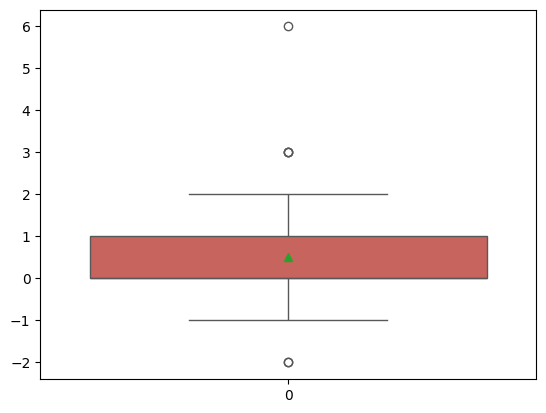

In [19]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

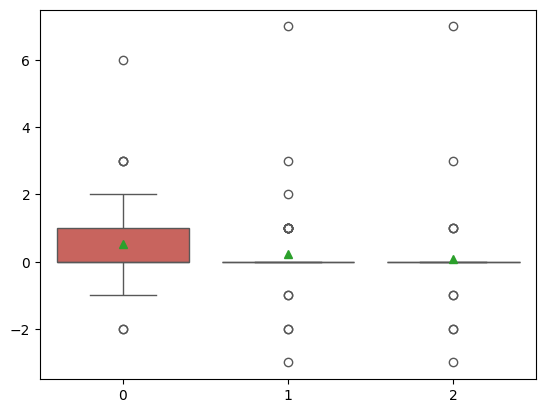

In [21]:
plot_n_boxplots([quasi_results[:, 0, 0, 1].flatten(), quasi_results[:, 0, 1, 1].flatten(), quasi_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

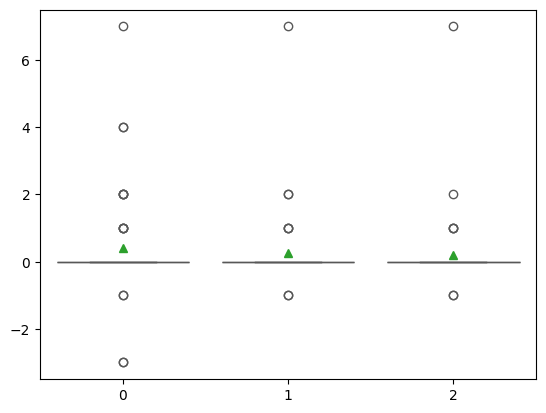

In [22]:
plot_n_boxplots([quasi_results[:, 1, 0, 1].flatten(), quasi_results[:, 1, 1, 1].flatten(), quasi_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [23]:
print(quasi_results[:, 0, 0, 1].flatten())

[ 0.  1.  1.  1.  2.  0.  0. -1.  0. -2.  0.  0. -1.  2.  0.  0.  0.  2.
 -1. -1.  1.  2.  3.  2.  2.  0.  0.  0.  0.  1.  0.  6.  0.  0.  0.  2.
 -1.  3.  1.  0. -2. -1.  0.  3.  0.  0.  0.  0.]


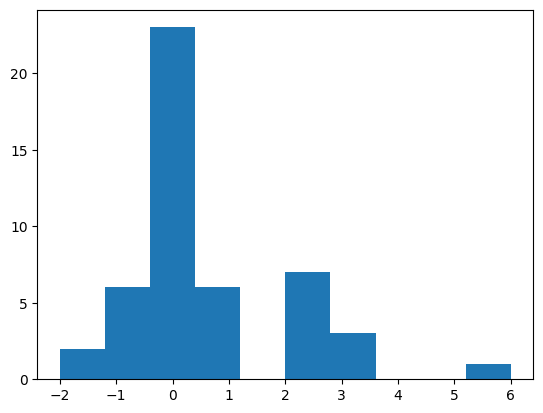

In [24]:
plt.hist(quasi_results[:, 0, 0, 1])
plt.show()

In [25]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.4992025094166808 0.01599852171497909


Investigating the statisitcs of itteration maximazing the average number of biological components.

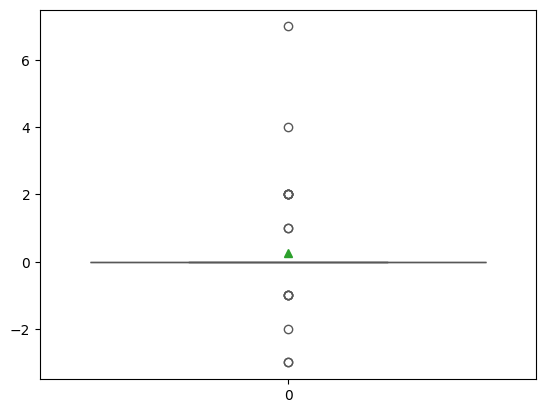

In [26]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

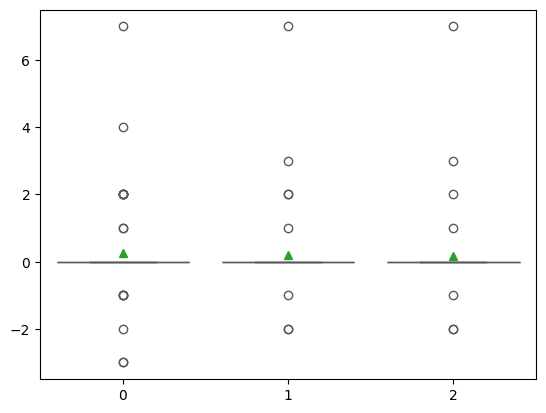

In [27]:
plot_n_boxplots([quasi_results[:, 1, 0, 2].flatten(), quasi_results[:, 1, 1, 2].flatten(), quasi_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to median

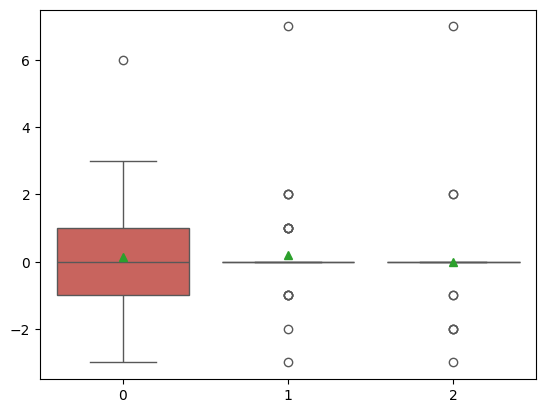

In [28]:
plot_n_boxplots([quasi_results[:, 0, 0, 2].flatten(), quasi_results[:, 0, 1, 2].flatten(), quasi_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [29]:
print(quasi_results[:, 1, 0, 2].flatten())

[-1.  0.  0.  0.  0.  0.  2.  0. -1.  0.  0.  0. -3.  0.  0.  0.  0.  0.
  4.  1.  1.  0.  2.  2.  0. -3. -1.  0.  2.  2.  0.  7.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2. -1. -2.  0.  0.]


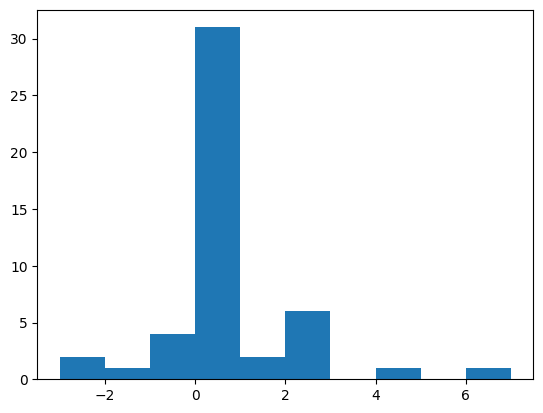

In [30]:
plt.hist(quasi_results[:, 1, 0, 2])
plt.show()

In [31]:
t_statistic, p_value = stats.ttest_1samp(a=quasi_results[:, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.2075735547844682 0.23325317278308605


Then Analysis of how peaks thresholding does on its own

In [32]:
epi_peak_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\0\peak")
epi_peak_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\1\peak")

In [36]:
epi_peak_ec_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [37]:
epi_peak_eo_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [38]:
for i, pth in enumerate(epi_peak_ec_folder.iterdir()):
    current = np.load(pth)
    epi_peak_ec_results[i, :, :, :] = current.copy()

In [39]:
for i, pth in enumerate(epi_peak_eo_folder.iterdir()):
    current = np.load(pth)
    epi_peak_eo_results[i, :, :, :] = current.copy()

In [40]:
epi_peak_results = epi_peak_ec_results.__add__(epi_peak_ec_results)/2

In [41]:
srm_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\peak")

In [42]:
srm_peak_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [43]:
for i, pth in enumerate(srm_peak_folder.iterdir()):
    current = np.load(pth)
    srm_peak_results[i, :, :, :] = current.copy()

In [44]:
spis_peak_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_1\peak")

In [45]:
spis_peak_results = np.zeros(
    (   
        16,
        2,
        3,
        5
    )
)

In [46]:
for i, pth in enumerate(spis_peak_folder.iterdir()):
    current = np.load(pth)
    spis_peak_results[i, :, :, :] = current.copy()

In [48]:
peak_results = np.zeros(
    (   
        48,
        2,
        3,
        5
    )
)

In [49]:
peak_results[0:16, :, :, :] = epi_peak_results
peak_results[16:32, :, :, :] = srm_peak_results
peak_results[32:48, :, :, :] = spis_peak_results

In [50]:
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.mean(peak_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)


In [110]:
#best median
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 0], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 1], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 2], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 3], 0)), (2, 3)))
print(np.unravel_index(np.argmax(np.median(peak_results[:, :, :, 4], 0)), (2, 3)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

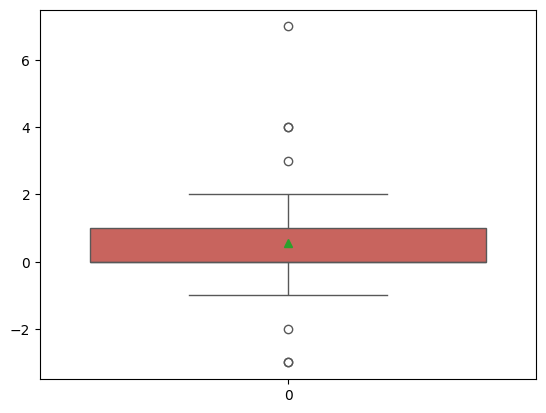

In [51]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

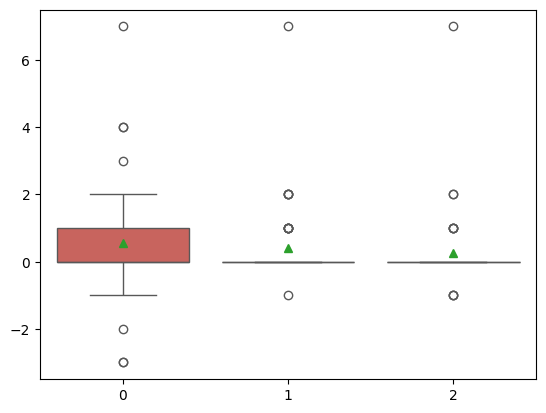

In [52]:
plot_n_boxplots([peak_results[:, 1, 0, 1].flatten(), peak_results[:, 1, 1, 1].flatten(), peak_results[:, 1, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

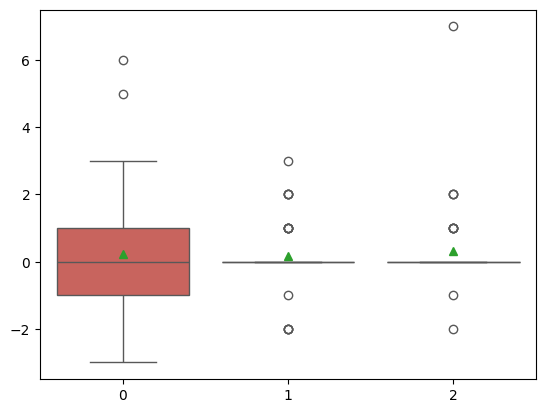

In [53]:
plot_n_boxplots([peak_results[:, 0, 0, 1].flatten(), peak_results[:, 0, 1, 1].flatten(), peak_results[:, 0, 2, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [54]:
print(peak_results[:, 1, 0, 1].flatten())

[-1.  0.  1.  2.  0.  1.  1.  2. -1.  0.  0.  2. -3.  2.  0.  0.  1.  0.
  3.  1.  1.  0.  4.  0.  1. -3. -1.  0.  0.  1.  0.  7.  0.  0.  0.  1.
  0.  1.  1.  0. -2.  0.  0.  4.  0.  1.  0. -1.]


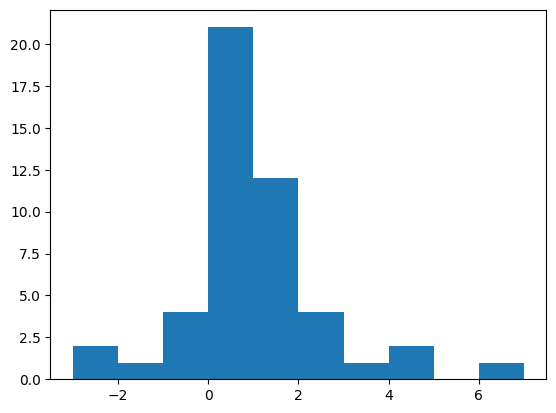

In [55]:
plt.hist(peak_results[:, 1, 0, 1])
plt.show()

In [56]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 0, 1], popmean=0) 
print(t_statistic , p_value)

2.257195748962429 0.028683629958366933


Mean seems a lot worse?

In [57]:
print(peak_results[:, 0, 0, 1].flatten())

[-1. -1. -2.  1.  0. -2.  2.  2. -2. -2.  1.  0. -3.  5. -2.  0.  1.  1.
  2.  0.  1.  1.  6.  0.  3. -3.  0.  0.  0.  1.  0.  3. -1.  0.  1.  1.
  0.  1.  1.  0. -2. -1.  0.  1. -2.  1.  0. -1.]


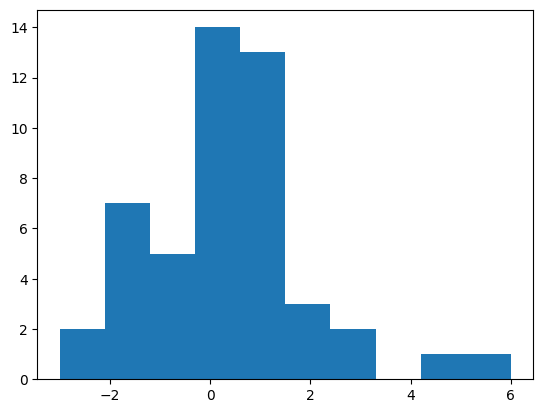

In [58]:
plt.hist(peak_results[:, 0, 0, 1])
plt.show()

In [59]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 1], popmean=0)
print(t_statistic , p_value)

0.881486652425409 0.3825403010514602


Investigating the statisitcs of itteration maximazing the average number of biological components.

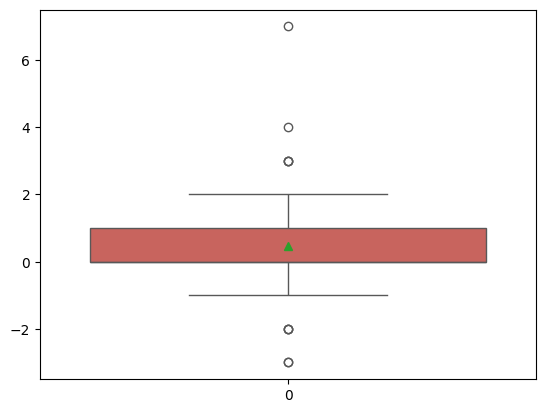

In [60]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

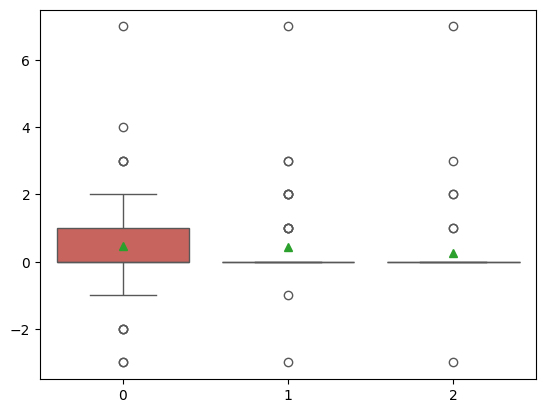

In [61]:
plot_n_boxplots([peak_results[:, 1, 0, 2].flatten(), peak_results[:, 1, 1, 2].flatten(), peak_results[:, 1, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to mean

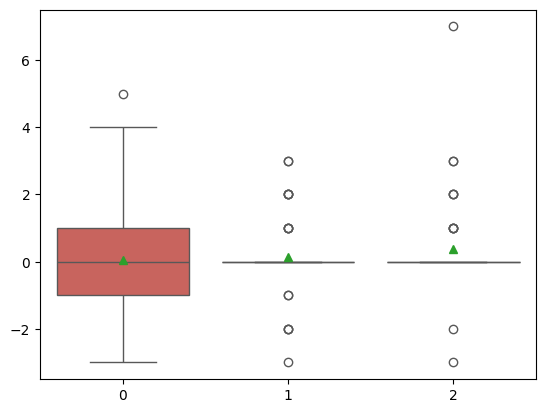

In [62]:
plot_n_boxplots([peak_results[:, 0, 0, 2].flatten(), peak_results[:, 0, 1, 2].flatten(), peak_results[:, 0, 2, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [63]:
print(peak_results[:, 1, 0, 2].flatten())

[-2.  0.  3.  1. -1.  1.  1.  2.  0.  0. -1.  2. -3.  2.  3.  0.  0.  1.
  3.  1.  0.  0.  2.  0. -1. -3. -2. -1.  0.  2.  1.  7.  0.  0.  0.  1.
  0.  2.  1.  0. -2.  0.  0.  4.  0. -1.  0. -1.]


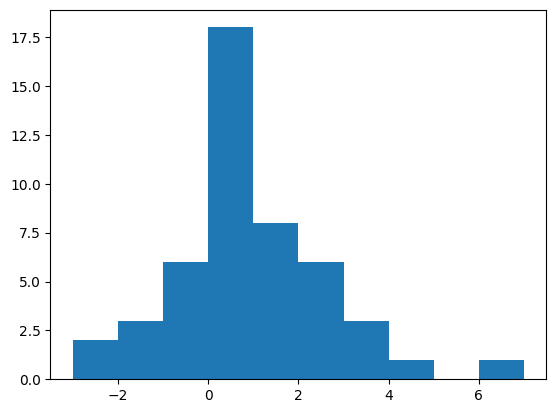

In [64]:
plt.hist(peak_results[:, 1, 0, 2])
plt.show()

In [65]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

1.7779765653790949 0.08187752904136629


Compared to mean

In [66]:
print(peak_results[:, 0, 0, 2].flatten())

[-2. -2.  0.  1. -1. -2.  2.  2. -1. -3.  0.  0. -3.  5. -2.  0.  0.  0.
  2.  1.  0.  1.  4.  0.  1. -3. -1. -1.  0.  2.  1.  3. -1.  0.  1.  1.
  0.  2.  1.  0. -2. -1.  0.  1. -2. -1.  0. -1.]


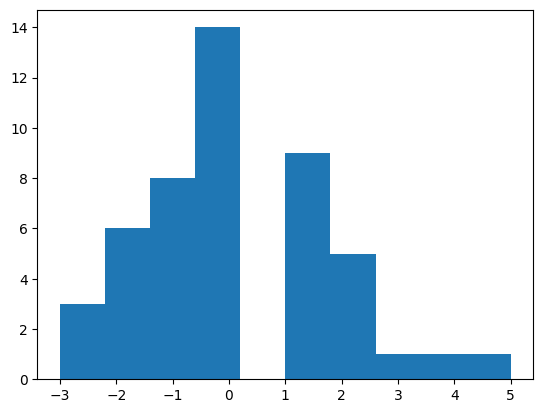

In [67]:
plt.hist(peak_results[:, 0, 0, 2])
plt.show()

In [68]:
t_statistic, p_value = stats.ttest_1samp(a=peak_results[:, 0, 0, 2], popmean=0) 
print(t_statistic , p_value)

0.16851940998230888 0.8668978062124468


Then comined!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [69]:
epi_combined_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\0\combined")
epi_combined_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\results_run_1\1\combined")

In [70]:
epi_combined_ec_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [71]:
epi_combined_eo_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [72]:
for i, pth in enumerate(epi_combined_ec_folder.iterdir()):
    current = np.load(pth)
    epi_combined_ec_results[i, :, :, :, :, :] = current.copy()

In [73]:
for i, pth in enumerate(epi_combined_eo_folder.iterdir()):
    current = np.load(pth)
    epi_combined_eo_results[i, :, :, :, :, :] = current.copy()

In [74]:
epi_combined_results = epi_combined_ec_results.__add__(epi_combined_ec_results)/2

In [75]:
srm_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\results_run_1\combined")

In [76]:
srm_combined_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [77]:
for i, pth in enumerate(srm_combined_folder.iterdir()):
    current = np.load(pth)
    srm_combined_results[i, :, :, :, :, :] = current.copy()

In [78]:
spis_combined_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_1\combined")

In [79]:
spis_combined_results = np.zeros(
    (   
        16,
        2,
        3,
        2,
        3,
        5
    )
)

In [80]:
for i, pth in enumerate(spis_combined_folder.iterdir()):
    current = np.load(pth)
    spis_combined_results[i, :, :, :, :, :] = current.copy()

In [83]:
combined_results = np.zeros(
    (   
        48,
        2,
        3,
        2,
        3,
        5
    )
)

In [84]:
combined_results[0:16, :, :, :] = epi_combined_results
combined_results[16:32, :, :, :] = srm_combined_results
combined_results[32:48, :, :, :] = spis_combined_results

In [85]:
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.mean(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 3)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 1, 1, 0)
(0, 0, 0, 0)
(1, 0, 0, 0)


In [111]:
#best median
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 0], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 1], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 2], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 3], 0)), (2, 3, 2, 3)))
print(np.unravel_index(np.argmax(np.median(combined_results[:, :, :, :, :, 4], 0)), (2, 3, 2, 3)))

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 1)
(1, 0, 0, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

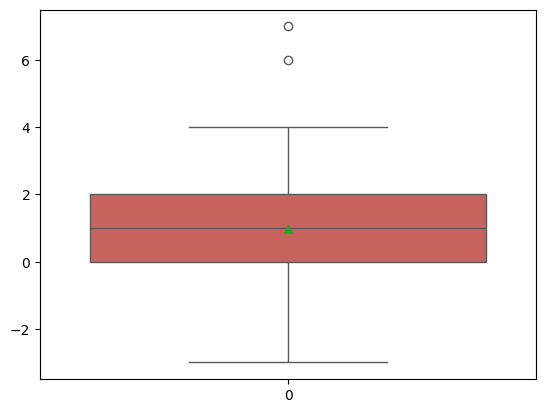

In [86]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

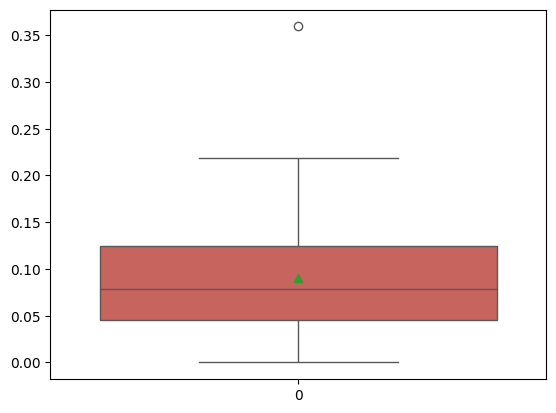

In [105]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 0].flatten()], [sns.xkcd_rgb["pale red"]])

Seems to be doing quite a lot better, at least for some eegs

Compared to the other thresholds

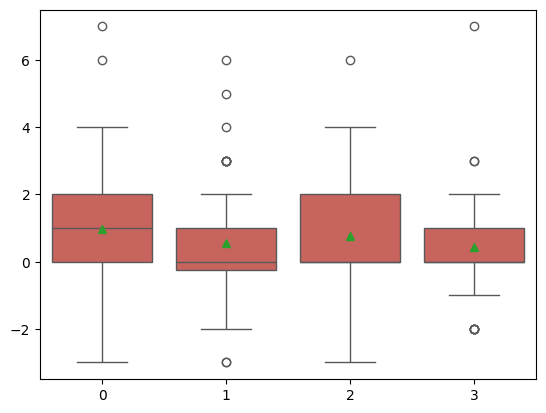

In [88]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], combined_results[:, 0, 1, 0, 0, 1], combined_results[:, 0, 0, 0, 1, 1], combined_results[:, 0, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all median?

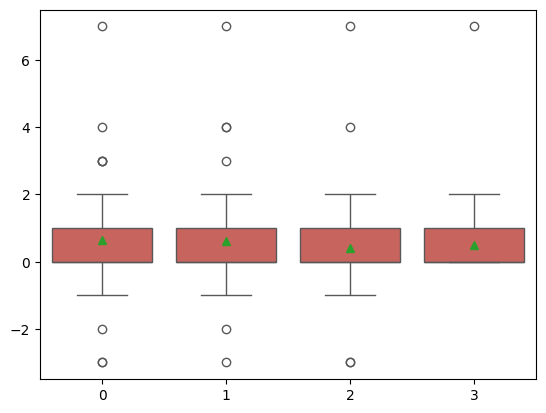

In [89]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 1], combined_results[:, 1, 1, 1, 0, 1], combined_results[:, 1, 0, 1, 1, 1], combined_results[:, 1, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

low thresholding is very robustm no decrease in brain components.
lets see how much data it discards

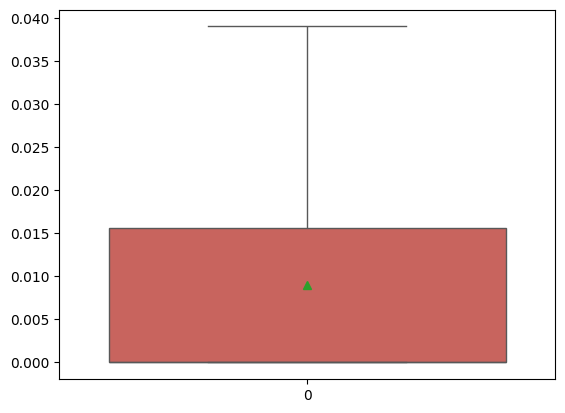

In [106]:
plot_n_boxplots([combined_results[:, 1, 1, 1, 1, 0].flatten()], [sns.xkcd_rgb["pale red"]])

Quasi median?

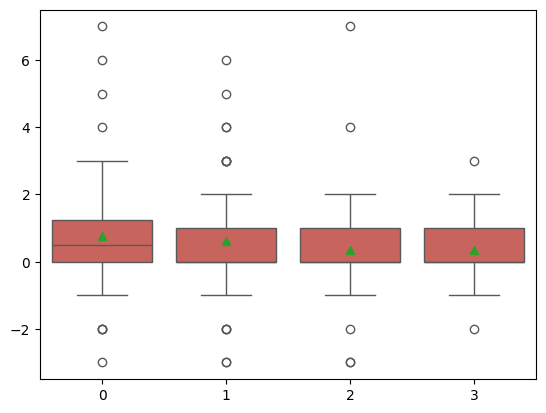

In [90]:
plot_n_boxplots([combined_results[:, 1, 0, 0, 0, 1], combined_results[:, 1, 1, 0, 0, 1], combined_results[:, 1, 0, 0, 1, 1], combined_results[:, 1, 1, 0, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

dont like that

peaks median?

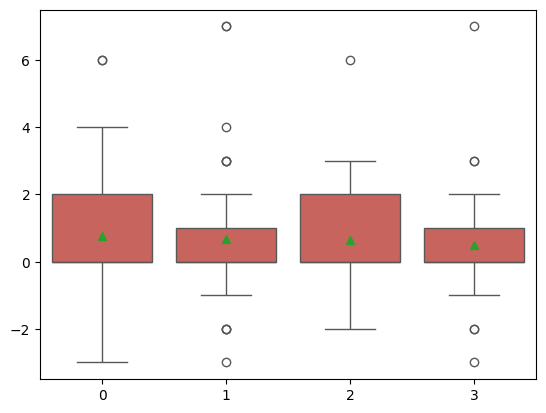

In [91]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 1], combined_results[:, 0, 1, 1, 0, 1], combined_results[:, 0, 0, 1, 1, 1], combined_results[:, 0, 1, 1, 1, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Not tooo excited about that one either

More stats for the best one.

In [92]:
print(combined_results[:, 0, 0, 0, 0, 1].flatten())

[ 1.  1.  1.  1.  2.  0.  2.  1.  0. -1.  2.  0. -2.  4.  0.  0.  0.  2.
  2. -1.  2.  2.  4.  2.  1. -3.  0.  0.  1.  2.  0.  4.  1.  0.  1.  0.
 -1.  7.  1.  1.  1. -1.  0.  2. -2.  1.  6.  0.]


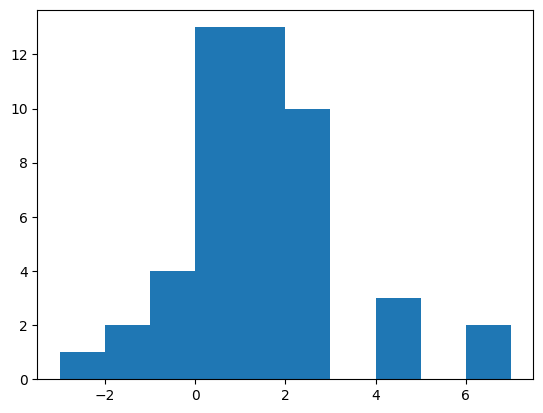

In [93]:
plt.hist(combined_results[:, 0, 0, 0, 0, 1])
plt.show()

In [94]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 0, 0, 0, 1], popmean=0) 
print(t_statistic , p_value)

3.665568424222133 0.0006265325980044734


What a bout the most "robust" one?

In [95]:
print(combined_results[:, 1, 1, 1, 1, 1])

[0. 0. 1. 2. 0. 1. 0. 1. 1. 0. 0. 2. 0. 2. 0. 0. 1. 0. 2. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 7. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


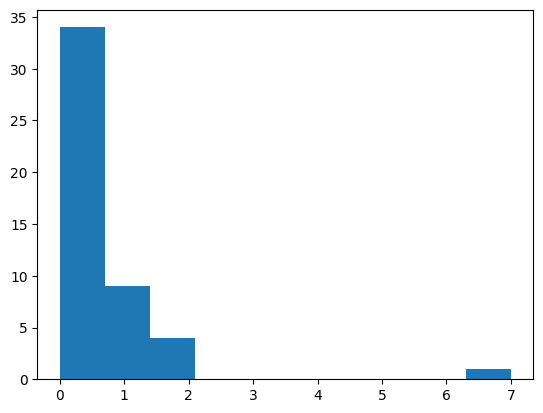

In [96]:
plt.hist(combined_results[:, 1, 1, 1, 1, 1])
plt.show()

In [97]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 1, 1, 1, 1, 1], popmean=0) 
print(t_statistic , p_value)

3.0160859061950456 0.004122494719286962


Investigating the statisitcs of itteration maximazing the average number of biological components.

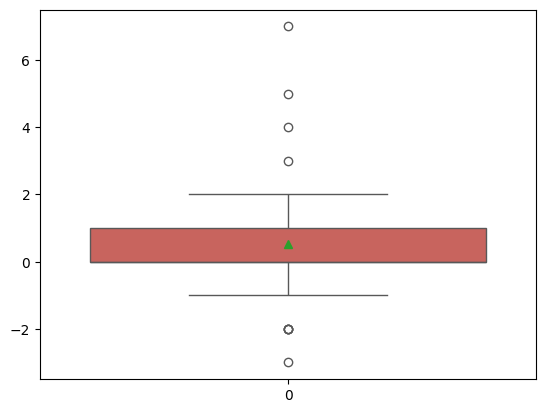

In [98]:
plot_n_boxplots([combined_results[:, 0, 1, 1, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

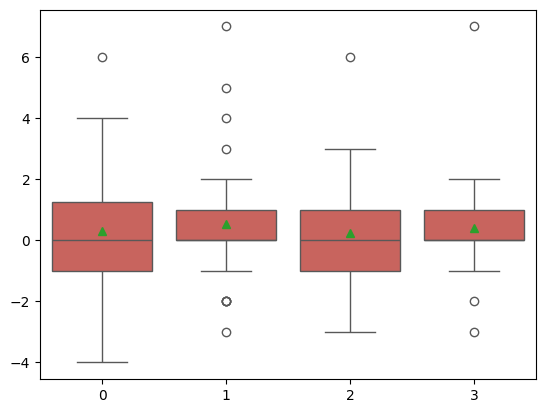

In [99]:
plot_n_boxplots([combined_results[:, 0, 0, 1, 0, 2], combined_results[:, 0, 1, 1, 0, 2], combined_results[:, 0, 0, 1, 1, 2], combined_results[:, 0, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

all median?

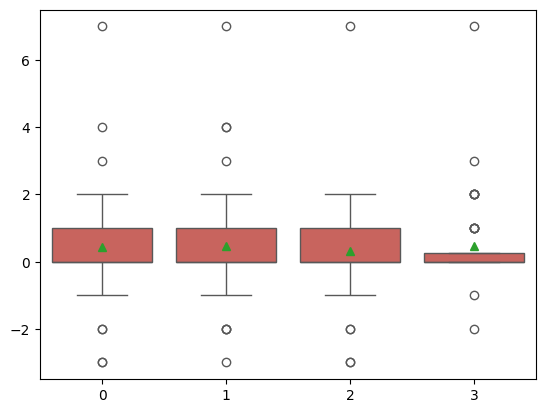

In [100]:
plot_n_boxplots([combined_results[:, 1, 0, 1, 0, 2], combined_results[:, 1, 1, 1, 0, 2], combined_results[:, 1, 0, 1, 1, 2], combined_results[:, 1, 1, 1, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

No bueno
all mean?

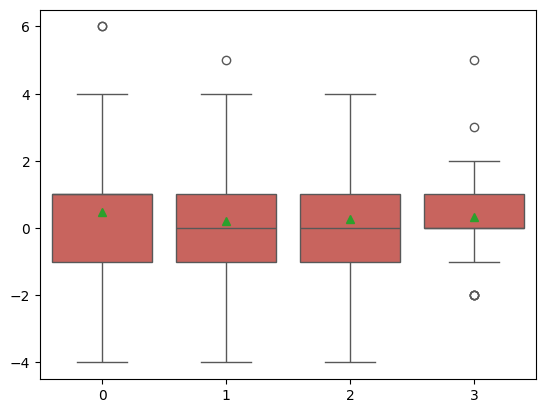

In [101]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 2], combined_results[:, 0, 1, 0, 0, 2], combined_results[:, 0, 0, 0, 1, 2], combined_results[:, 0, 1, 0, 1, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

All horrible, except for low thresholds

More stats for the best one.

In [102]:
print(combined_results[:, 0, 1, 1, 0, 2].flatten())

[-2.  0. -1.  1.  0.  1.  1.  2.  1.  0.  0.  2. -2.  2.  0.  0.  0.  1.
  3.  1.  0.  1.  5.  2.  1. -3. -2. -1.  0.  2.  1.  7.  0.  0.  0.  1.
 -1.  2.  1.  0. -2. -1.  0.  4.  0. -1.  0. -1.]


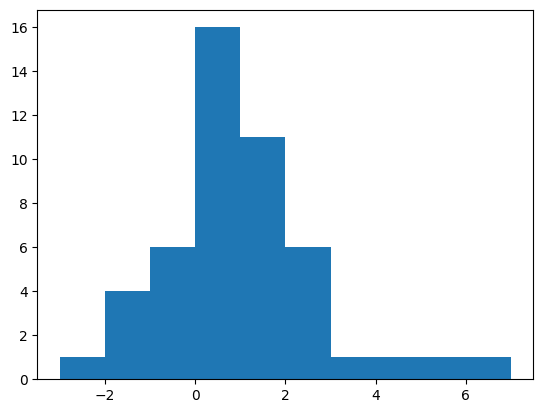

In [103]:
plt.hist(combined_results[:, 0, 1, 1, 0, 2])
plt.show()

In [104]:
t_statistic, p_value = stats.ttest_1samp(a=combined_results[:, 0, 1, 1, 0, 2], popmean=0) 
print(t_statistic , p_value)

2.006671532020847 0.05055677030465135


best from each con of distributions

Best mean

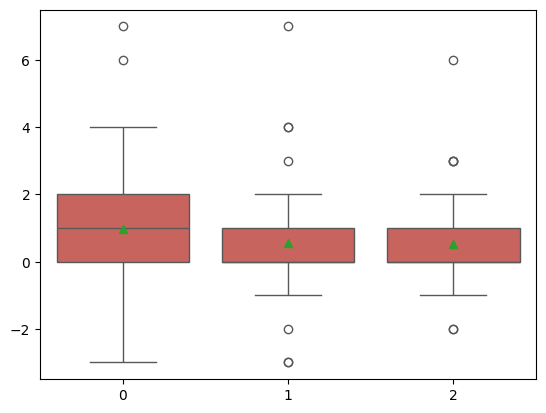

In [108]:
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 1], peak_results[:, 1, 0, 1], quasi_results[:, 0, 0, 1]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

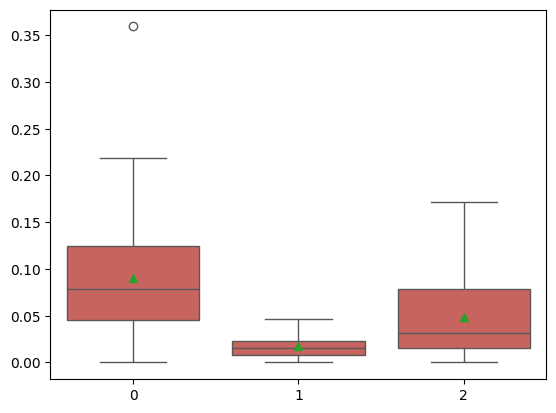

In [118]:
# discarded
plot_n_boxplots([combined_results[:, 0, 0, 0, 0, 0], peak_results[:, 1, 0, 0], quasi_results[:, 0, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Best biocomp

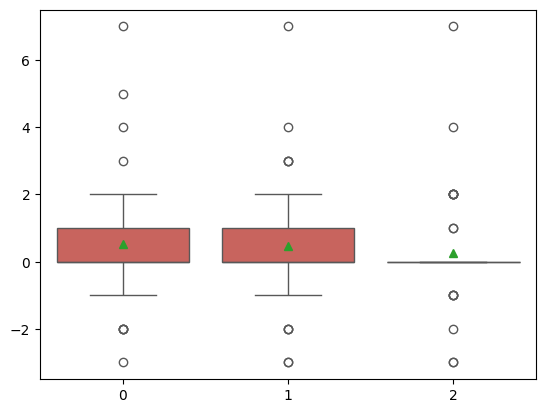

In [116]:
plot_n_boxplots([combined_results[:, 0, 1, 1, 0, 2], peak_results[:, 1, 0, 2], quasi_results[:, 1, 0, 2]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

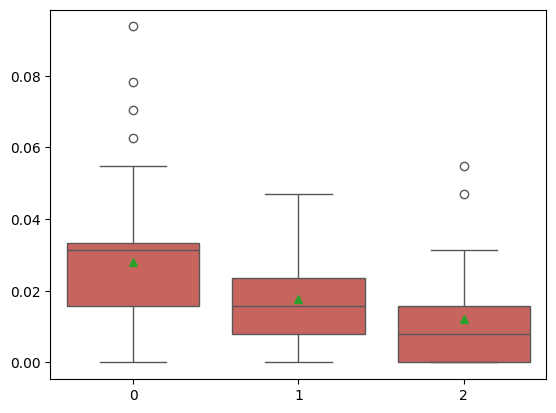

In [117]:
#Discarded
plot_n_boxplots([combined_results[:, 0, 1, 1, 0, 0], peak_results[:, 1, 0, 0], quasi_results[:, 1, 0, 0]], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])